<a href="https://colab.research.google.com/github/Ujanghost/QuantumLatticeSim/blob/main/QuantumLatticeSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

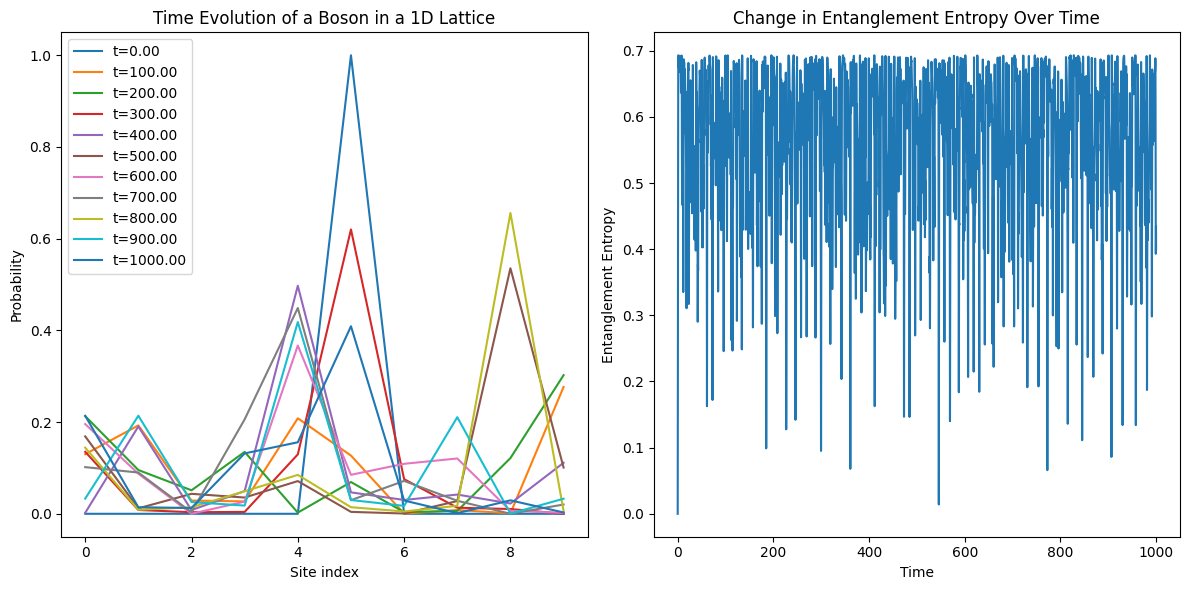

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Parameters
N = 10  # Number of sites
t = 1.0  # Hopping amplitude
dt = 0.01  # Time step
num_steps = 100000  # Number of time steps

# Initial state: boson at the center of the lattice
psi_0 = np.zeros(N, dtype=complex)
psi_0[N // 2] = 1

# Hamiltonian matrix
H = np.zeros((N, N), dtype=complex)
for i in range(N - 1):
    H[i, i + 1] = -t
    H[i + 1, i] = -t

# Time evolution operator
U = expm(-1j * H * dt)

# Function to compute the wavefunction at each time step
def time_evolution(psi_0, U, num_steps):
    psi_t = [psi_0]
    psi = psi_0
    for _ in range(num_steps):
        psi = U @ psi
        psi_t.append(psi)
    return np.array(psi_t)

# Function to calculate the entanglement entropy of the wavefunction
def entanglement_entropy(psi, N):
    # Density matrix
    rho = np.outer(psi, np.conj(psi))

    # Reduced density matrix for the first half of the system
    L = N // 2
    rho_A = rho[:L, :L] + rho[L:, L:]

    # Eigenvalues of the reduced density matrix
    eigenvalues = np.linalg.eigvalsh(rho_A)

    # Compute the entanglement entropy
    entropy = -np.sum(eigenvalues * np.log(eigenvalues + 1e-12))  # small offset to avoid log(0)
    return entropy

# Compute the time evolution
psi_t = time_evolution(psi_0, U, num_steps)

# Compute the entanglement entropy at each time step
entropies = [entanglement_entropy(psi, N) for psi in psi_t]

# Plot the probability distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for n in range(0, num_steps + 1, num_steps // 10):
    plt.plot(np.abs(psi_t[n])**2, label=f't={n*dt:.2f}')
plt.xlabel('Site index')
plt.ylabel('Probability')
plt.legend()
plt.title('Time Evolution of a Boson in a 1D Lattice')

# Plot the entanglement entropy
plt.subplot(1, 2, 2)
plt.plot(np.arange(num_steps + 1) * dt, entropies)
plt.xlabel('Time')
plt.ylabel('Entanglement Entropy')
plt.title('Change in Entanglement Entropy Over Time')

plt.tight_layout()
plt.show()


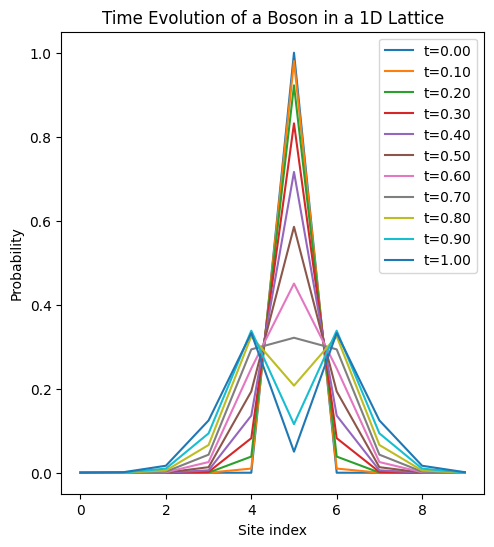

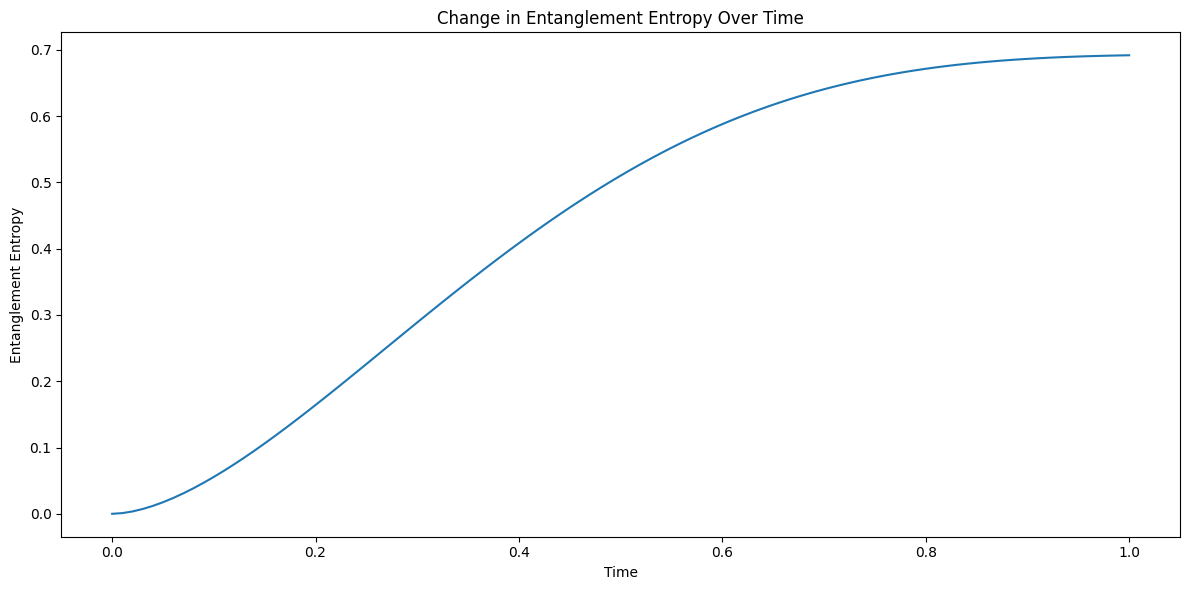

In [4]:
# Save the probability distributions plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for n in range(0, num_steps + 1, num_steps // 10):
    plt.plot(np.abs(psi_t[n])**2, label=f't={n*dt:.2f}')
plt.xlabel('Site index')
plt.ylabel('Probability')
plt.legend()
plt.title('Time Evolution of a Boson in a 1D Lattice')

# Save the figure
plt.savefig('time_evolution.png')

# Plot and save the entanglement entropy plot
plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_steps + 1) * dt, entropies)
plt.xlabel('Time')
plt.ylabel('Entanglement Entropy')
plt.title('Change in Entanglement Entropy Over Time')

# Save the figure
plt.savefig('entanglement_entropy.png')

plt.tight_layout()
plt.show()
